# Pymaceuticals Inc.



 Analysis

   Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from IPython.display import Markdown, display
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results,mouse_metadata, how= "left", on = 'Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mouse = combined_data_df["Mouse ID"].nunique()
num_mouse

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_data = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mice['Mouse ID'])]
# Display the duplicate mice
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df[~combined_data_df['Mouse ID'].isin(duplicate_data['Mouse ID'])]

clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
num_clean = clean_df['Mouse ID'].nunique()
num_clean

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


# Group the data by 'Drug Regimen' and calculate the required statistics
summary_df = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns in the summary DataFrame
summary_df.rename(columns={'mean': 'Mean Tumor Volume',
                           'median': 'Median Tumor Volume',
                           'var': 'Tumor Volume Variance',
                           'std': 'Tumor Volume Std. Dev.',
                           'sem': 'Tumor Volume Std. Err.'}, inplace=True)

# Display the summary DataFrame
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


# Function to display text as Markdown
def display_markdown(text):
    display(Markdown(text))
# Print statement with center alignment

display_markdown("<center>Tumor Volume (mm3)</center>")


#print("Tumor Volume (mm3)")
summary_df = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'mean', 'median': 'median', 'var': 'var', 'std': 'std', 'sem': 'sem'})

summary_df


<center>Tumor Volume (mm3)</center>

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

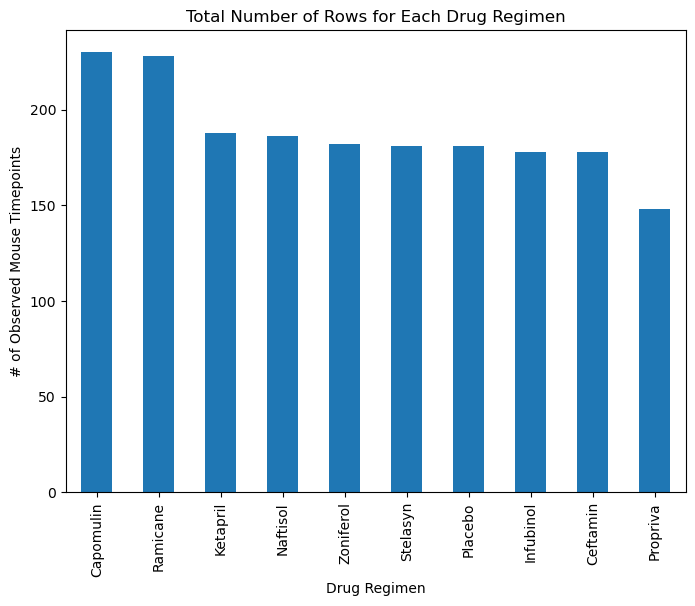

In [8]:


# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Define the desired order of drug regimens
desired_order = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']

# Group the data by 'Drug Regimen' and count the number of rows
regimen_counts = clean_df.groupby('Drug Regimen').size()

# Reindex the counts based on the desired order
regimen_counts = regimen_counts.reindex(desired_order)

# Create the bar plot
regimen_counts.plot(kind='bar', figsize=(8, 6))

# Set the plot title and axis labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()


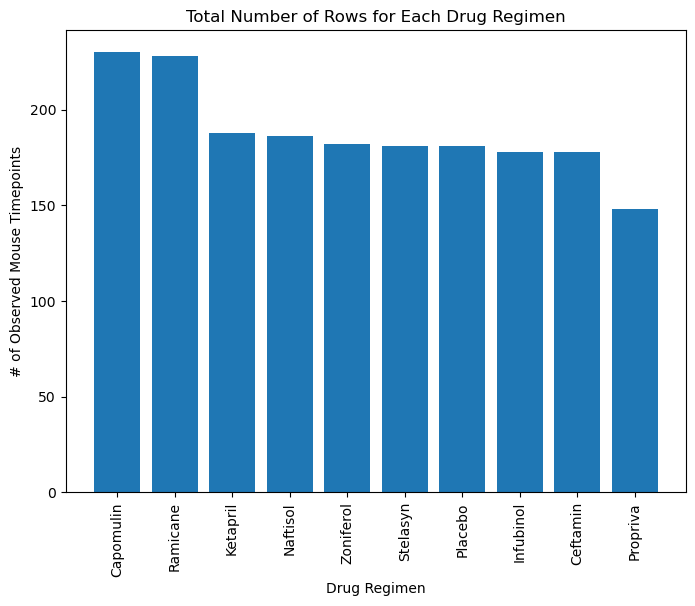

In [9]:


# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Define the desired order of drug regimens
desired_order = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']

# Group the data by 'Drug Regimen' and count the number of rows
regimen_counts = clean_df.groupby('Drug Regimen').size()

# Reindex the counts based on the desired order
regimen_counts = regimen_counts.reindex(desired_order)

# Set the figure size
plt.figure(figsize=(8, 6))

# Generate the bar plot with the desired order
plt.bar(range(len(regimen_counts)), regimen_counts)

# Set the x-axis tick positions and labels
plt.xticks(range(len(regimen_counts)), desired_order, rotation='vertical')

# Set the plot title and axis labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()


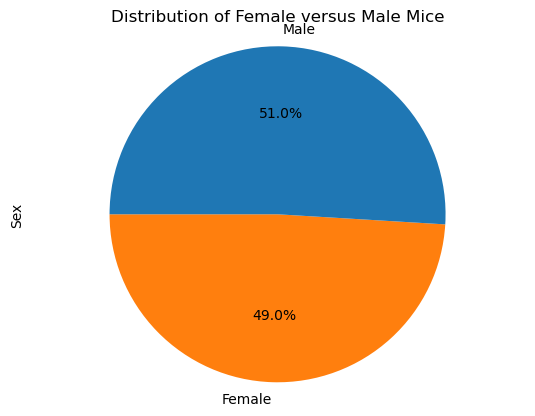

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


# Group the data by 'Sex' and count the number of rows
sex_counts = clean_df.groupby('Sex').size()

# Define a custom color palette for male and female
colors = ['#ff7f0e','#1f77b4']

# Create the pie plot
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=colors)

# Set the plot title
plt.title('Distribution of Female versus Male Mice')

plt.ylabel('Sex')
# Set the aspect ratio to 'equal' for a circular pie
plt.axis('equal')

# Display the plot
plt.show()


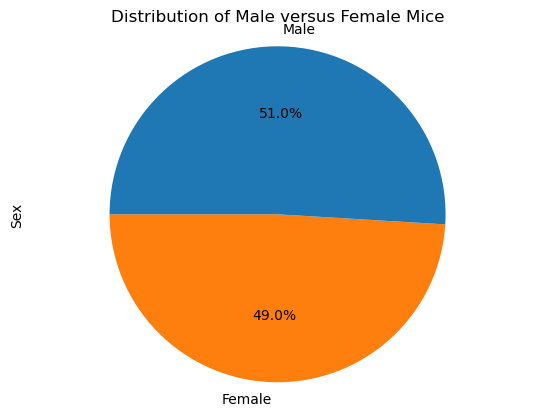

In [11]:


# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of male and female mice
sex_counts = clean_df['Sex'].value_counts()

# Define the labels and sizes for the pie plot with "Male" at the top
labels = ['Female','Male' ]
sizes = [sex_counts['Female'],sex_counts['Male'] ]

# Define the colors for male and female slices
colors = ['#ff7f0e','#1f77b4' ]

# Create the pie plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)

# Set the plot title
plt.title('Distribution of Male versus Female Mice')
plt.ylabel('Sex')
# Set the aspect ratio to 'equal' for a circular pie
plt.axis('equal')

# Display the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Create a list of the desired treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last timepoints with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the DataFrame to include only the desired treatment regimens
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

# Display the final tumor volume of each mouse across the treatment regimens
final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [13]:


# Put treatments into a list for the loop and plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add the tumor volumes to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the interquartile range (IQR) and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Print the potential outliers for the current treatment regimen
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")


plt.show()


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


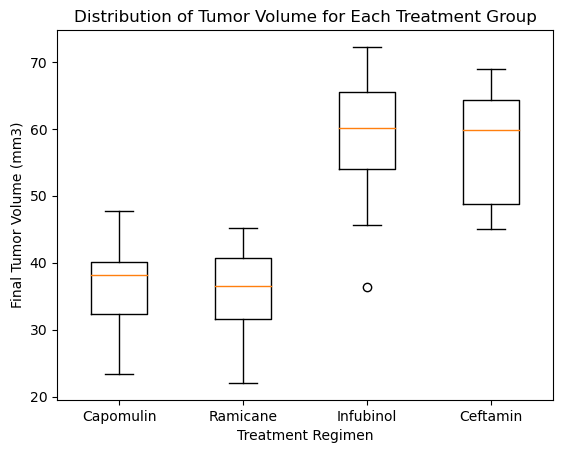

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a box plot to show the distribution of tumor volume for each treatment group

plt.boxplot(tumor_volume_data, labels=treatments)
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.show()

## Line and Scatter Plots

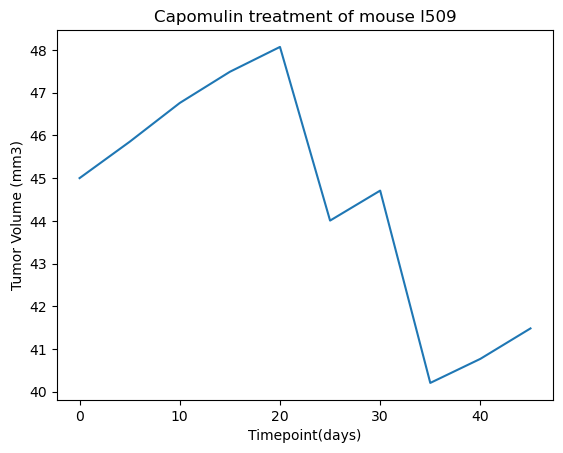

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for mice treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Filter the data for the specific mouse (l509)
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

# Generate the line plot of tumor volume vs. time point
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

plt.show()


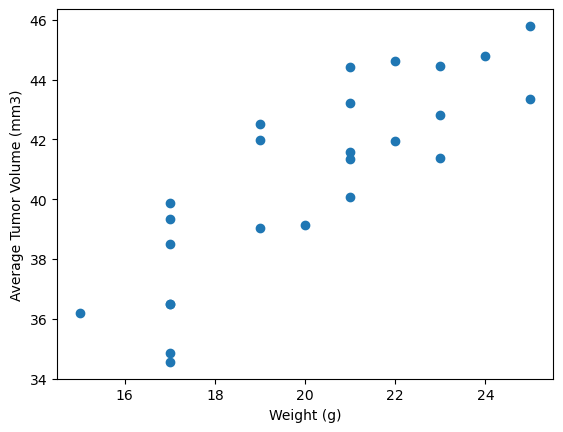

In [24]:

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume and mouse weight data
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID')
merged_data = merged_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)_y']]
merged_data = merged_data.drop_duplicates()

# Generate the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_y'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


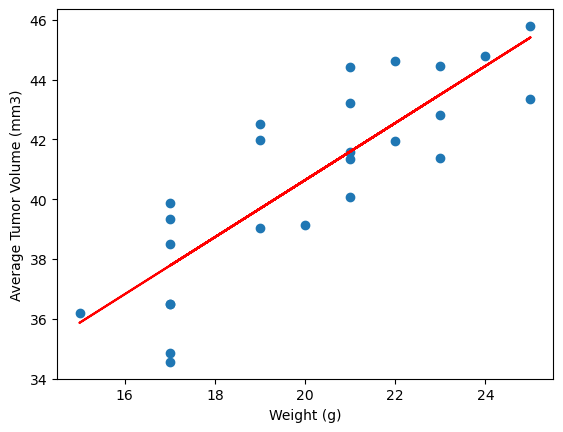

In [23]:
# Calculate the correlation coefficient and a linear regression model 

# Filter the data for the Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume and mouse weight data
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID')
merged_data = merged_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)_y']]
merged_data = merged_data.drop_duplicates()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_y'])[0],2)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_y'])

# Generate the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_y'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is  {correlation}")

# Add linear regression line
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red')

plt.show()

# Print correlation coefficient and linear regression model summary


